In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
os.chdir('M:/')

In [2]:
sa_stats = pd.read_csv('sa_stats.csv')
ms_stats = pd.read_csv('ms_stats.csv')
south_stats = pd.read_csv('south_stats.csv')
eu_stats = pd.read_csv('eu_stats.csv')
eufut_stats = pd.read_csv('eufut_stats.csv')
caribb_stats = pd.read_csv('caribb_stats.csv')
cen_america_stats = pd.read_csv('cen_america_stats.csv')
america_stats = pd.read_csv('america_stats.csv')
africa_stats = pd.read_csv('africa_stats.csv')
asia_stats = pd.read_csv('asia_stats.csv')

In [3]:
world_stats = pd.concat([sa_stats,ms_stats,south_stats,
                         eu_stats,eufut_stats,caribb_stats,
                         cen_america_stats,america_stats,
                        africa_stats,asia_stats],ignore_index=True,sort=False)

In [4]:
world_stats.head()

,Country,Capital,Abrv,Population,Facebook_users,Internet_users
0,Argentina,Buenos Aires,AR,44688864,30000000,41586960
1,Bolivia,La Paz,BO,11215674,6100000,7570580
2,Brazil,Brasilia,BR,210867954,139000000,149057635
3,Colombia,Santiago,CL,18197209,13000000,14108392
4,Chile,Bogotá,CO,49464683,29000000,31275567


In [5]:
world_stats.shape

(223, 6)

In [6]:
world_stats.describe()

,Population,Facebook_users,Internet_users
count,2.230000e+02,2.230000e+02,2.230000e+02
mean,3.355968e+07,9.426801e+06,1.862457e+07
std,1.368128e+08,2.838345e+07,7.217523e+07
min,5.000000e+01,0.000000e+00,0.000000e+00
25%,4.362905e+05,1.100000e+05,1.900100e+05
50%,5.561389e+06,1.100000e+06,2.599678e+06
75%,2.067021e+07,5.250000e+06,9.011714e+06
max,1.420062e+09,2.510000e+08,8.290000e+08


In [7]:
world_df = world_stats.set_index('Country').copy()

In [8]:
world_df.head()

,Capital,Abrv,Population,Facebook_users,Internet_users
Country,,,,,
Argentina,Buenos Aires,AR,44688864,30000000,41586960
Bolivia,La Paz,BO,11215674,6100000,7570580
Brazil,Brasilia,BR,210867954,139000000,149057635
Colombia,Santiago,CL,18197209,13000000,14108392
Chile,Bogotá,CO,49464683,29000000,31275567


In [9]:
plt.style.use('fivethirtyeight')

In [10]:
world_dfplot1 = world_df.sort_values('Facebook_users')

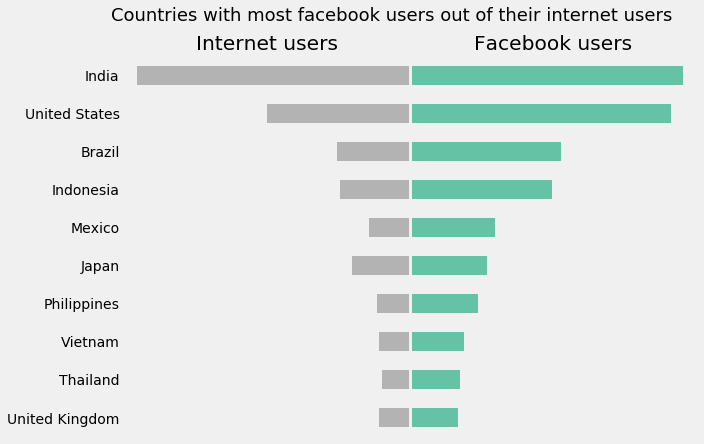

In [11]:
color_pal = sns.color_palette("Set2", 11) 

plt.subplot(1, 2, 1)
ax1 = world_dfplot1['Internet_users'].tail(10).plot(kind='barh', figsize=(10, 6), color=color_pal[7], title='Internet users')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.invert_xaxis()
ax1.set_xticklabels([])
ax1.grid(None)
ax1.set_ylabel(None)

plt.subplot(1, 2, 2)
ax2 = world_dfplot1['Facebook_users'].tail(10).plot(kind='barh', figsize=(10, 6), color=color_pal[8], title='Facebook users')
ax2_y = ax2.get_yaxis()
ax2.grid(None)
ax2_y.set_visible(False)
ax2.set_xticklabels([])

plt.suptitle('Countries with most facebook users out of their internet users', fontsize=18, y=1.03, x=0.555)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()

In [12]:
world_dfplot2 = world_df.sort_values('Population')

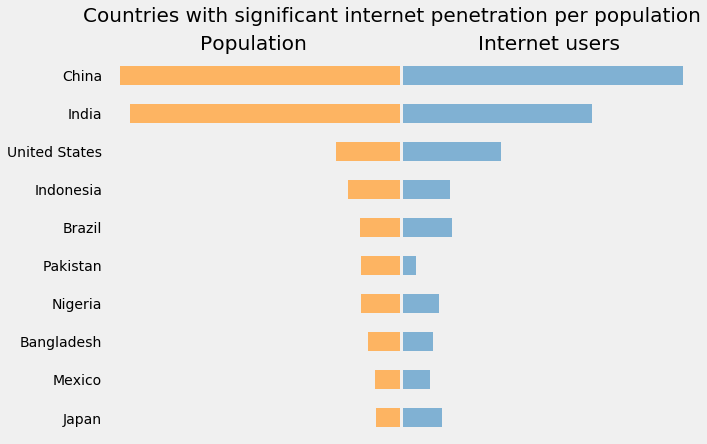

In [13]:
color_pal = sns.color_palette("Set3", 11) 

plt.subplot(1, 2, 1)
ax1 = world_dfplot2['Population'].tail(10).plot(kind='barh', figsize=(10, 6), color=color_pal[5], title='Population')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.invert_xaxis()
ax1.set_xticklabels([])
ax1.grid(None)
ax1.set_ylabel(None)

plt.subplot(1, 2, 2)
ax2 = world_dfplot2['Internet_users'].tail(10).plot(kind='barh', figsize=(10, 6), color=color_pal[4], title='Internet users')
ax2_y = ax2.get_yaxis()
ax2.grid(None)
ax2_y.set_visible(False)
ax2.set_xticklabels([])

plt.suptitle('Countries with significant internet penetration per population', fontsize=20, y=1.03, x=0.555)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()

**Kmeans clustering**

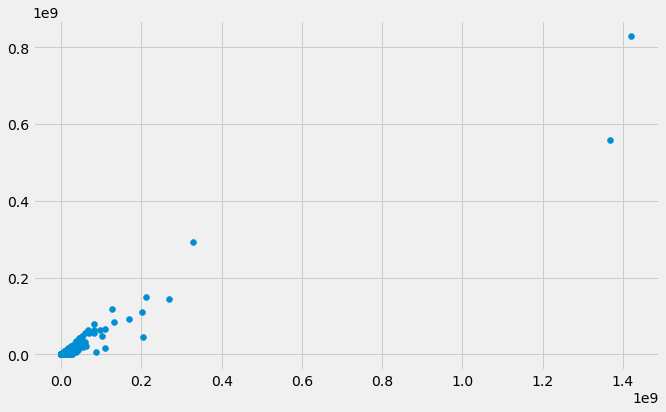

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(world_stats['Population'],world_stats['Internet_users'])
plt.show()

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [16]:
Y = world_stats[['Internet_users']]
X = world_stats[['Population']]
X_norm = (X - X.mean()) / (X.max() - X.min())
Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())

Text(0, 0.5, 'Score')

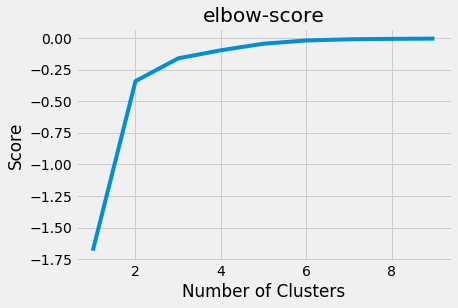

In [17]:
nc = np.arange(1,10,1)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(Y_norm).score(Y_norm) for i in range(len(kmeans))]
score

plt.plot(nc,score)
plt.title('elbow-score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [18]:
pca = PCA(n_components=1).fit(Y_norm)
pca_d = pca.transform(Y_norm)
pca_c = pca.transform(X_norm)

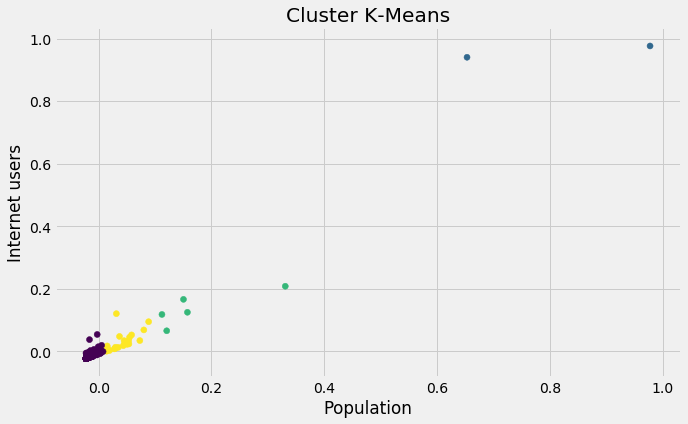

In [19]:
kmeans=KMeans(n_clusters=4,random_state=1234)
kmeansoutput=kmeans.fit(Y_norm)
kmeansoutput
plt.figure(figsize=(10,6))
plt.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_)
plt.ylabel('Internet users')
plt.xlabel('Population')
plt.title('Cluster K-Means')

plt.show()

In [20]:
label = pd.Series(kmeansoutput.labels_)

In [21]:
world_cluster = pd.concat([world_stats,label],axis=1)

In [23]:
world_cluster['Cluster_name'] = ['cluster0' if x == 0 else\
                           'cluster1' if x == 1 else\
                           'cluster2' if x == 2 else\
                           'cluster3' for x in label]

In [24]:
world_cluster.columns = ['Country','Capital','Abrv','Population',
                        'Facebook_users', 'Internet_users','Cluster_label','Cluster_name']

In [25]:
world_cluster.head()

,Country,Capital,Abrv,Population,Facebook_users,Internet_users,Cluster_label,Cluster_name
0,Argentina,Buenos Aires,AR,44688864,30000000,41586960,3,cluster3
1,Bolivia,La Paz,BO,11215674,6100000,7570580,0,cluster0
2,Brazil,Brasilia,BR,210867954,139000000,149057635,2,cluster2
3,Colombia,Santiago,CL,18197209,13000000,14108392,0,cluster0
4,Chile,Bogotá,CO,49464683,29000000,31275567,3,cluster3


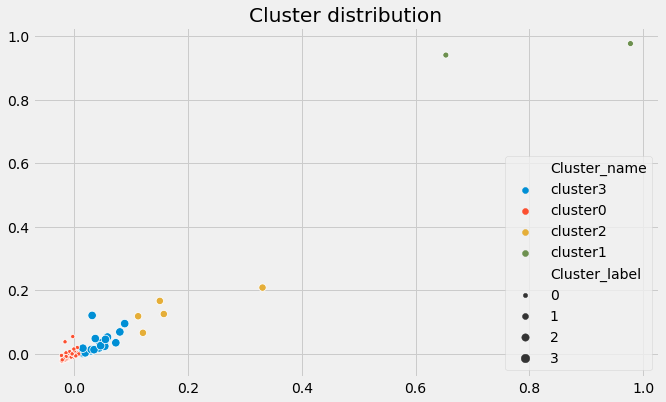

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_d[:, 0], pca_c[:, 0],hue=world_cluster['Cluster_name'],size=world_cluster['Cluster_label'])
plt.title('Cluster distribution')
plt.legend(loc=4)
plt.show()

In [27]:
world_cluster.loc[world_cluster['Cluster_label'] == 3]

,Country,Capital,Abrv,Population,Facebook_users,Internet_users,Cluster_label,Cluster_name
0,Argentina,Buenos Aires,AR,44688864,30000000,41586960,3,cluster3
4,Chile,Bogotá,CO,49464683,29000000,31275567,3,cluster3
15,Iran,Tehran,IR,82011735,40000000,62702731,3,cluster3
24,Syria,Riyadh,SA,34140662,18000000,30257715,3,cluster3
65,France,Paris,FR,65480710,33000000,60421689,3,cluster3
66,Germany,Berlin,DE,82438636,31000000,79127551,3,cluster3
70,Italy,Rome,IT,59216525,30000000,54798299,3,cluster3
76,Poland,Warsaw,PL,38028278,14000000,29757099,3,cluster3
81,Spain,Madrid,ES,46441049,23000000,42961230,3,cluster3
83,United Kingdom,London,UK,66959016,44000000,63061419,3,cluster3


In [28]:
world_cluster.loc[world_cluster['Cluster_label'] == 2]

,Country,Capital,Abrv,Population,Facebook_users,Internet_users,Cluster_label,Cluster_name
2,Brazil,Brasilia,BR,210867954,139000000,149057635,2,cluster2
129,United States,Washington D.C,US,329093110,240000000,292892868,2,cluster2
169,Nigeria,Abuja,NG,200962417,17000000,111632516,2,cluster2
199,Indonesia,Jakarta,ID,269536482,130000000,143260000,2,cluster2
200,Japan,Tokyo,JP,126854745,71000000,118626672,2,cluster2


In [29]:
world_cluster.loc[world_cluster['Cluster_label'] == 1]

,Country,Capital,Abrv,Population,Facebook_users,Internet_users,Cluster_label,Cluster_name
195,China,Beijing,CN,1420062022,1800000,829000000,1,cluster1
198,India,New Delhi,IN,1368737513,251000000,560000000,1,cluster1


In [30]:
world_cluster.loc[world_cluster['Cluster_label'] == 0]

,Country,Capital,Abrv,Population,Facebook_users,Internet_users,Cluster_label,Cluster_name
1,Bolivia,La Paz,BO,11215674,6100000,7570580,0,cluster0
3,Colombia,Santiago,CL,18197209,13000000,14108392,0,cluster0
5,Ecuador,Quito,EC,16863425,10000000,13476687,0,cluster0
6,Falkland Islands,Stanley,FK,2922,3100,2900,0,cluster0
7,French Guiana,Cayenne,GF,289763,110000,120000,0,cluster0
8,Guyana,Georgetown,GY,782225,360000,395007,0,cluster0
9,Paraguay,Asuncion,PY,6896908,3300000,6177748,0,cluster0
10,Peru,Lima,PE,32551815,20000000,22000000,0,cluster0
11,Surinam,Paramaribo,SR,568301,310000,340000,0,cluster0
12,Uruguay,Montevideo,UY,3469551,2400000,3059727,0,cluster0
